<a href="https://colab.research.google.com/github/rayjinghaolei/UWARG-CV/blob/main/YoloV2_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [6]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2021-02-07 23:33:15--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  7.89MB/s    in 53s     

2021-02-07 23:34:08 (3.69 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [7]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov2.weights
CMakeLists.txt	image_yolov4.sh		README.md
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104

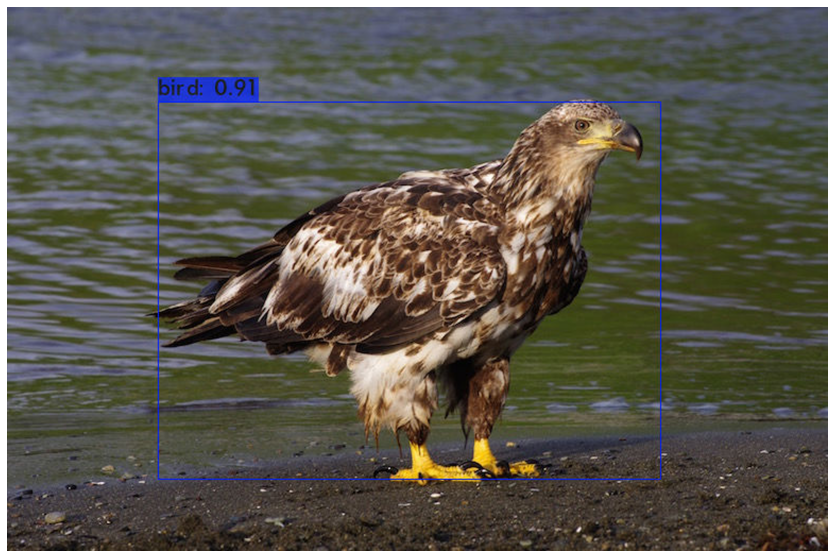

In [8]:
!ls
!./darknet detect cfg/yolov2.cfg yolov2.weights data/eagle.jpg
imShow('predictions.jpg')

In [9]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [10]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [11]:
!ls /mydrive/yolov2_transfer_learning

box_2.jpg  box.jpg	      obj.data	 references.gdoc
box_3.jpg  generate_train.py  obj.names  yolov2_custom.cfg
box_4.jpg  generate_valid.py  obj.zip	 yolov2_custom_final.weights


In [12]:
%cd darknet/

/content/darknet


In [13]:
!cp /mydrive/yolov2_transfer_learning/obj.zip ../

In [14]:
%cd data/
!mkdir images
!ls
%cd ..

/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   openimages.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  person.jpg
coco.names  goal.txt	 images			   scream.jpg
dog.jpg     horses.jpg	 labels			   voc.names
/content/darknet


In [15]:
!unzip ../obj.zip -d data/images

Archive:  ../obj.zip
   creating: data/images/train/
  inflating: data/images/__MACOSX/._train  
  inflating: data/images/train/63.jpg  
  inflating: data/images/__MACOSX/train/._63.jpg  
  inflating: data/images/train/189.jpg  
  inflating: data/images/__MACOSX/train/._189.jpg  
  inflating: data/images/train/77.jpg  
  inflating: data/images/__MACOSX/train/._77.jpg  
  inflating: data/images/train/289.txt  
  inflating: data/images/train/162.jpg  
  inflating: data/images/__MACOSX/train/._162.jpg  
  inflating: data/images/train/176.jpg  
  inflating: data/images/__MACOSX/train/._176.jpg  
  inflating: data/images/train/88.jpg  
  inflating: data/images/__MACOSX/train/._88.jpg  
  inflating: data/images/train/29.txt  
  inflating: data/images/train/15.txt  
  inflating: data/images/train/114.txt  
  inflating: data/images/train/228.jpg  
  inflating: data/images/__MACOSX/train/._228.jpg  
  inflating: data/images/train/100.txt  
  inflating: data/images/train/214.jpg  
  inflating: d

In [16]:
!cp /mydrive/yolov2_transfer_learning/yolov2_custom.cfg ./cfg
!cp /mydrive/yolov2_transfer_learning/obj.data ./data
!cp /mydrive/yolov2_transfer_learning/obj.names ./data
!cp /mydrive/yolov2_transfer_learning/generate_train.py ./
!cp /mydrive/yolov2_transfer_learning/generate_valid.py ./

In [17]:
!python generate_train.py
!python generate_valid.py
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 images			   openimages.names  valid.txt
dog.jpg     horses.jpg	 labels			   person.jpg	     voc.names


In [18]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2021-02-07 23:34:44--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  3.53MB/s    in 25s     

2021-02-07 23:35:09 (2.99 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [19]:
!ls

3rdparty	darknet19_448.conv.23	image_yolov4.sh        README.md
backup		DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       vcpkg.json
cfg		data			net_cam_v3.sh	       video_yolov3.sh
cmake		generate_train.py	net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	generate_valid.py	obj		       yolov2.weights
darknet		image_yolov3.sh		predictions.jpg


In [25]:
%cd ..
!cp -r './darknet' '/mydrive/darknet'
%cd darknet

/content
/content/darknet


In [ ]:
!./darknet detector train data/obj.data cfg/yolov2_custom.cfg darknet19_448.conv.23 -dont_show

In [21]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov2_custom.cfg
!sed -i 's/subdivision=16/subdivision=1/' yolov2_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [22]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box.jpg -thresh 0.5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

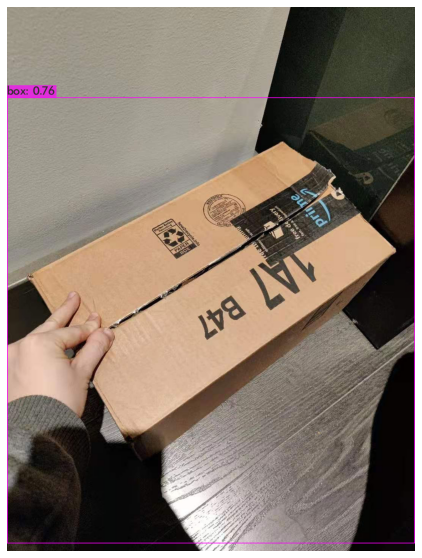

In [23]:
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

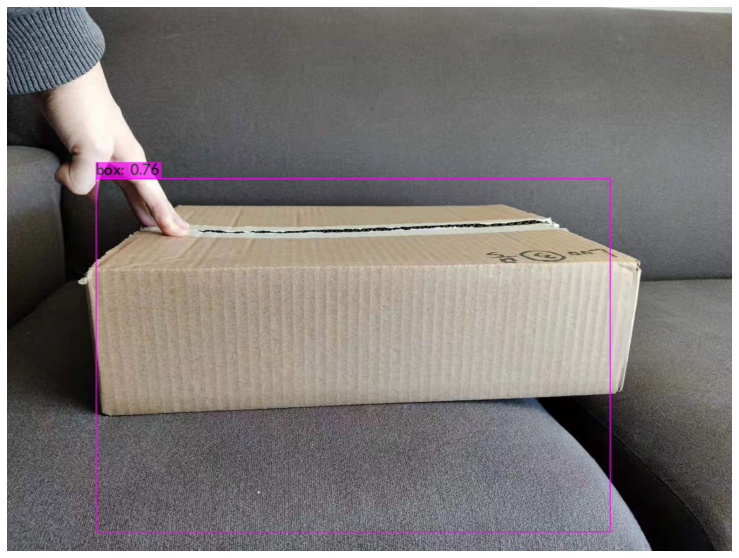

In [24]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_2.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

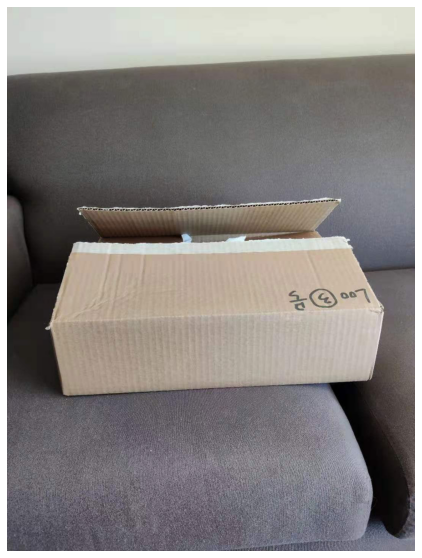

In [25]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_3.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

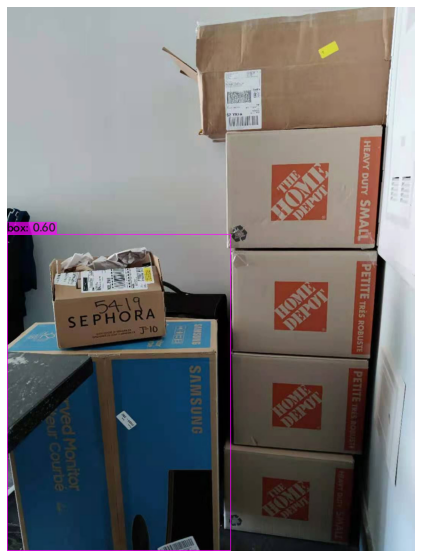

In [26]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_4.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

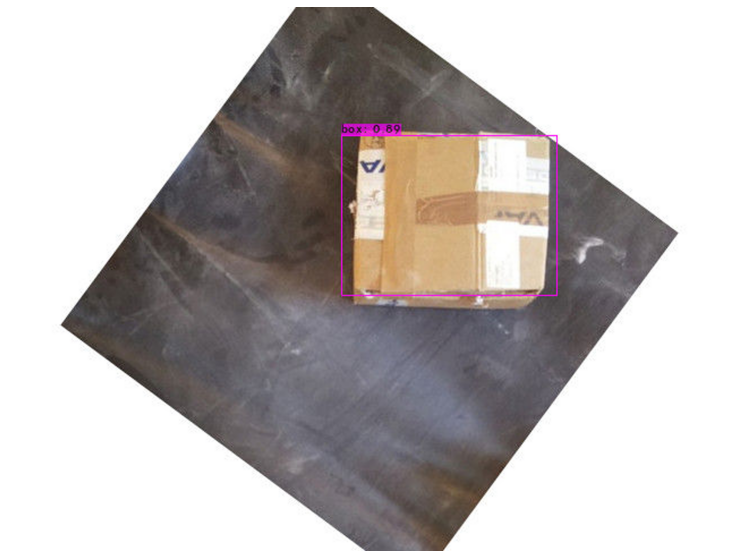

In [27]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights ./data/images/valid/10.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

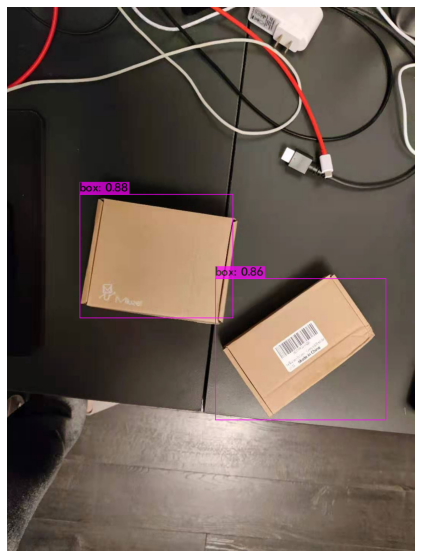

In [20]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_5.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

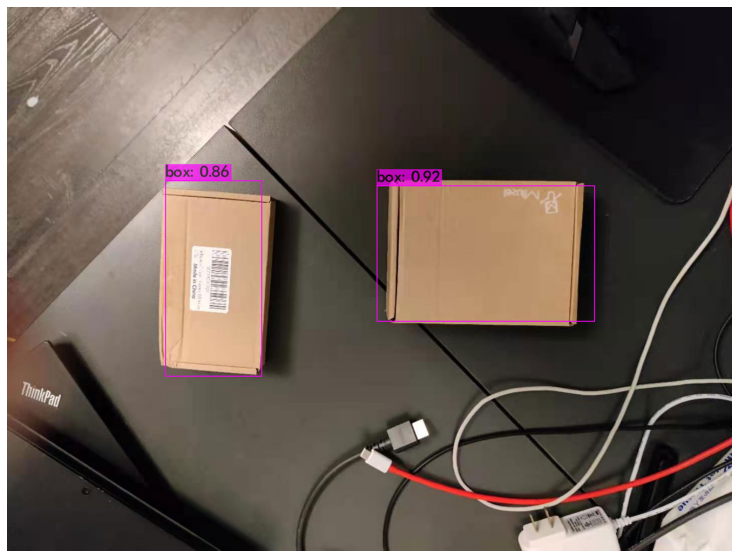

In [21]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_6.jpg -thresh 0.5
imShow('predictions.jpg')